In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [181]:
df = pd.read_csv("update.csv")
df.sample(20)

,Unnamed: 0,Make,Model,Vehicle_Type,Engine_Capacity,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),vehicle_age,Distance_Driven_Last_Month,Fuel_Consumed_Last_Month
4861,4861,HONDA,CIVIC COUPE,Four-Wheeler,2.0,4,AV,Petrol,7.8,6.0,7.0,40,163,4,700.0,49.00
1,1,ACURA,ILX,Four-Wheeler,2.4,4,M6,Diesel,11.2,7.7,9.6,29,221,4,940.0,90.24
6007,6007,JEEP,Grand Cherokee 4X4,Four-Wheeler,5.7,8,A8,Petrol,16.7,10.9,14.1,20,331,5,1070.0,150.87
7093,7093,LEXUS,IS 300 AWD,Four-Wheeler,3.5,6,AS6,Diesel,12.3,9.1,10.9,26,254,4,1050.0,114.45
2859,2859,KIA,SORENTO,Four-Wheeler,2.0,4,AS6,Petrol,11.7,8.6,10.3,27,245,4,700.0,72.10
1750,1750,LAND ROVER,RANGE ROVER SUPERCHARGED,Four-Wheeler,5.0,8,AS8,Electric,25.0,16.9,21.4,13,342,6,800.0,171.20
5864,5864,GMC,Terrain,Four-Wheeler,1.6,4,A6,CNG,8.5,6.0,7.4,38,199,4,660.0,48.84
3488,3488,CHEVROLET,CAMARO,Four-Wheeler,3.6,6,AS8,Petrol,12.3,8.6,10.6,27,249,4,860.0,91.16
4623,4623,CHEVROLET,TAHOE FFV,Four-Wheeler,5.3,8,A6,Electric,19.8,13.9,17.2,16,285,5,930.0,159.96
5530,5530,BMW,650i xDrive Gran Coupe,Four-Wheeler,4.4,8,AS8,Diesel,14.0,9.6,12.0,24,282,5,1140.0,136.80


In [182]:
df.drop(columns=['Unnamed: 0', 'Model', 'Make'], inplace=True)

In [183]:
col = df["CO2 Emissions(g/km)"]
df = df.drop(columns=["CO2 Emissions(g/km)"])
df.insert(len(df.columns), "CO2 Emissions(g/km)", col)


In [184]:
X = df.drop(columns=[
    'CO2 Emissions(g/km)',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (mpg)'
])
y = df['CO2 Emissions(g/km)']


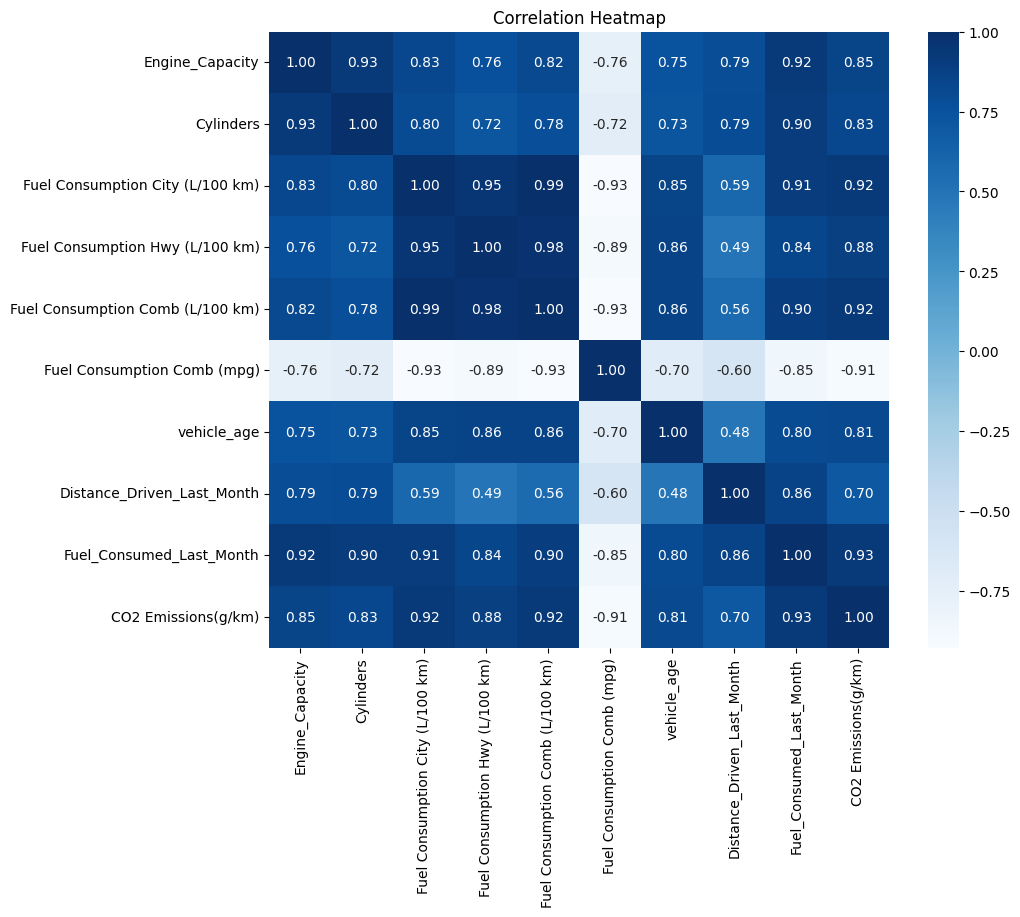

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.select_dtypes(include=['float64','int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [186]:
# from sklearn.preprocessing import LabelEncoder

# for col in X.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col])
def simplify_transmission(value):
    if value.startswith("M"):   
        return "Manual"
    else:                       
        return "Automatic"

X['Transmission'] = X['Transmission'].apply(simplify_transmission)
print(X['Transmission'].unique())


['Automatic' 'Manual']


In [187]:
categorical = ['Fuel Type', 'Transmission', 'Vehicle_Type']
numeric = ['Engine_Capacity', 'Cylinders', 'vehicle_age',
           'Distance_Driven_Last_Month', 'Fuel_Consumed_Last_Month']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numeric)
    ])


In [188]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [189]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [190]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

evaluate_model("Random Forest (Pipeline)", y_test, y_pred)


Random Forest (Pipeline) Results:
R² Score: 0.996
MAE: 2.24
RMSE: 3.51


In [191]:
print("Train R²:", r2_score(y_train, model.predict(X_train)))
print("Test R²:", r2_score(y_test, y_pred))

Train R²: 0.9987076448374304
Test R²: 0.9964245943527817


In [218]:
df.describe()

,Engine_Capacity,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),vehicle_age,Distance_Driven_Last_Month,Fuel_Consumed_Last_Month,CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,4.397969,891.809072,100.768699,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,0.627055,177.459818,41.184211,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,3.000000,600.000000,27.060000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,4.000000,740.000000,69.560000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,4.000000,860.000000,93.500000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,5.000000,1000.000000,124.120000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,8.000000,1540.000000,310.800000,522.000000


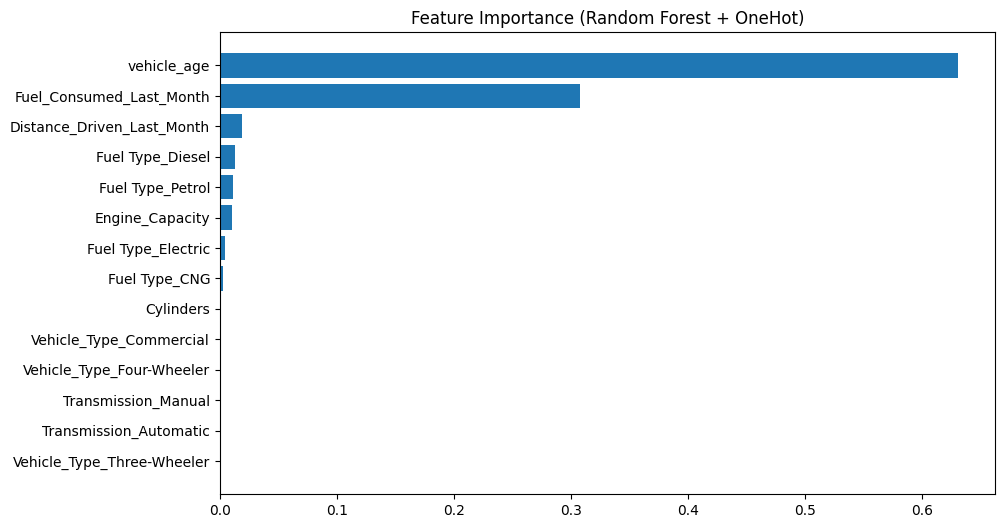

In [192]:
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(categorical)
all_features = list(ohe_features) + numeric

# Get importances from the Random Forest
importances = model.named_steps["regressor"].feature_importances_

feat_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_df["Feature"], feat_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest + OneHot)")
plt.show()

In [193]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("\nCross-Validation R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())



Cross-Validation R² scores: [0.98455966 0.99598298 0.99555426 0.99726302 0.99623126]
Mean CV R²: 0.9939182360000298


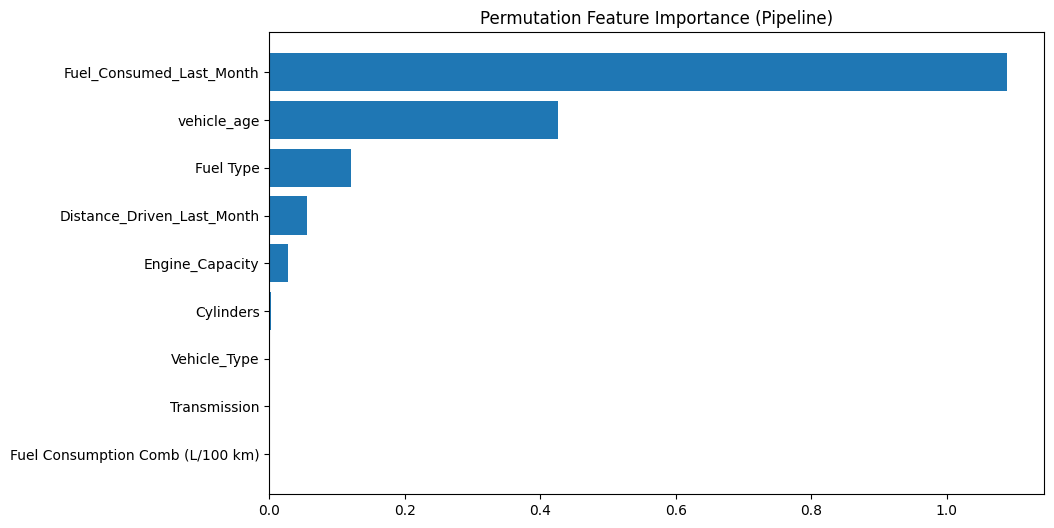

In [194]:
from sklearn.inspection import permutation_importance

# Run permutation importance on the trained pipeline
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Collect into DataFrame
perm_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(perm_df["Feature"], perm_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance (Pipeline)")
plt.show()


In [213]:
def show_model_inputs(model, X, categorical, numeric):    
    print("Model expects the following features for input:\n")
    
    
    for col in categorical:
        unique_vals = X[col].unique()
        print(f"Categorical Feature: '{col}'")
        print(f"  Allowed values → {list(unique_vals)}\n")
    
    
    for col in numeric:
        print(f"Numeric Feature: '{col}'")
        print(f"  Range → {X[col].min()} to {X[col].max()}")
        print(f"  Mean  → {X[col].mean():.2f}")
        print(f"  Std   → {X[col].std():.2f}\n")

show_model_inputs(model, X, categorical, numeric)


Model expects the following features for input:

Categorical Feature: 'Fuel Type'
  Allowed values → ['Diesel', 'CNG', 'Petrol', 'Electric', 'Hybrid']

Categorical Feature: 'Transmission'
  Allowed values → ['Automatic', 'Manual']

Categorical Feature: 'Vehicle_Type'
  Allowed values → ['Four-Wheeler', 'Commercial', 'Three-Wheeler']

Numeric Feature: 'Engine_Capacity'
  Range → 0.9 to 8.4
  Mean  → 3.16
  Std   → 1.35

Numeric Feature: 'Cylinders'
  Range → 3 to 16
  Mean  → 5.62
  Std   → 1.83

Numeric Feature: 'vehicle_age'
  Range → 3 to 8
  Mean  → 4.40
  Std   → 0.63

Numeric Feature: 'Distance_Driven_Last_Month'
  Range → 600.0 to 1540.0
  Mean  → 891.81
  Std   → 177.46

Numeric Feature: 'Fuel_Consumed_Last_Month'
  Range → 27.059999999999995 to 310.8
  Mean  → 100.77
  Std   → 41.18



In [214]:
import pandas as pd

def predict_emission(model, input_data, categorical, numeric):
    df_input = pd.DataFrame([input_data], columns=categorical + numeric)
    prediction = model.predict(df_input)[0]
    print(f"Predicted CO₂ Emissions: {prediction:.2f} g/km")

    return prediction


In [217]:
sample_input = {
    "Fuel Type": "Petrol",
    "Transmission": "Automatic",
    "Vehicle_Type": "SUV",
    "Engine_Capacity": 2.0,
    "Cylinders": 4,
    "vehicle_age": 3,
    "Distance_Driven_Last_Month": 200,
    "Fuel_Consumed_Last_Month": 85
}

predict_emission(model, sample_input, categorical, numeric)


Predicted CO₂ Emissions: 247.28 g/km


247.28072578463204

# ISSUE DUE TO LABEL ENCODINGS: FEATURE DOMINANCE(FUEL CONSUMPTION)

In [176]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model("Random Forest", y_test, y_pred_rf)



Random Forest Results:
R² Score: 0.995
MAE: 2.06
RMSE: 4.17


In [141]:
from sklearn.metrics import r2_score

y_train_pred_rf = rf.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred_rf))

print("Test R²:", r2_score(y_test, y_pred_rf))


Train R²: 0.9990345474477532
Test R²: 0.9949482406032026


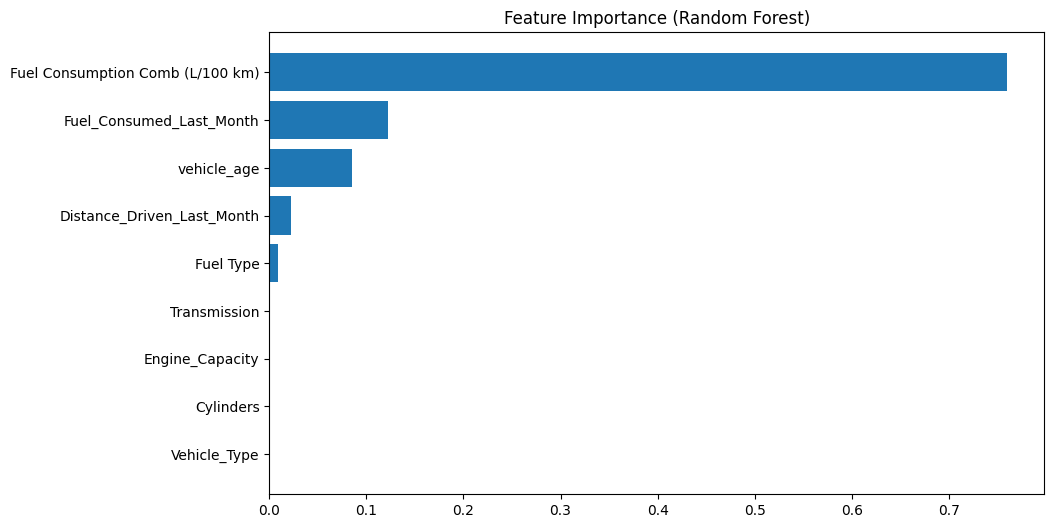

In [177]:
import matplotlib.pyplot as plt
import pandas as pd


importances = rf.feature_importances_
features = X.columns


feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_df["Feature"], feat_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.show()



In [143]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-Validation R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


Cross-Validation R² scores: [0.98622151 0.9945932  0.99590023 0.99805808 0.99755451]
Mean CV R²: 0.9944655054219922
